In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def pltDisplayGray(title, img): 
    plt.imshow(img,'gray',vmin=0,vmax=255)
    plt.title(title)
    plt.show()

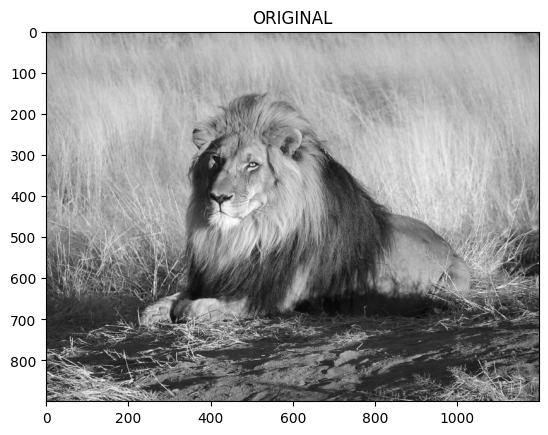

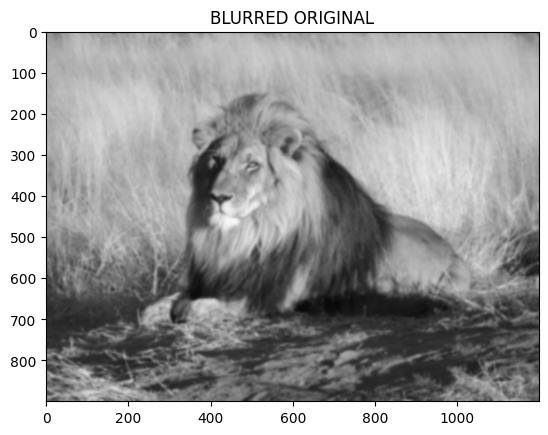

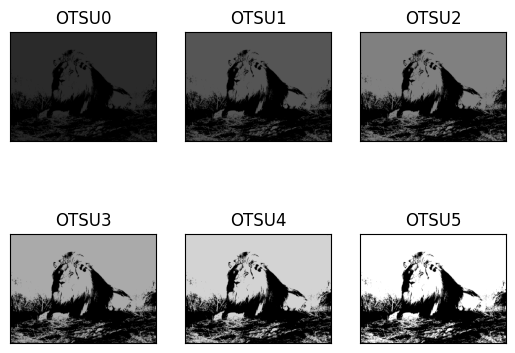

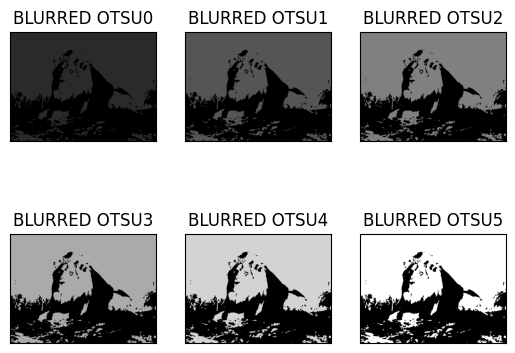

"\nfor i in range(6):\n plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)\n plt.title(titles[i])\n plt.xticks([]),plt.yticks([])\n \nplt.show()\n"

In [3]:
img = cv.imread("test_holo.jpg", cv.IMREAD_GRAYSCALE)

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
ret,thresh6 = cv.threshold(img,127,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#titles = ['Original Image','BINARY','BINARY_INV','TOZERO','TOZERO_INV', 'OTSU']
#images = [img, thresh1, thresh2, thresh4, thresh5, thresh6]

plt.imshow(img,'gray',vmin=0,vmax=255)
plt.title('ORIGINAL')
plt.show()

blur = cv.GaussianBlur(img,(15,15),0)
plt.imshow(blur,'gray',vmin=0,vmax=255)
plt.title('BLURRED ORIGINAL')
plt.show()

max = 255/6

for i in range(6):
 ret,thresh = cv.threshold(img,0,max,cv.THRESH_BINARY+cv.THRESH_OTSU)   
 plt.subplot(2,3,i+1),plt.imshow(thresh,'gray',vmin=0,vmax=255)
 plt.title('OTSU' + str(i))
 plt.xticks([]),plt.yticks([])
 max += 255/6
 
plt.show()

max = 255/6

for i in range(6):
 ret,thresh = cv.threshold(blur,0,max,cv.THRESH_BINARY+cv.THRESH_OTSU)   
 plt.subplot(2,3,i+1),plt.imshow(thresh,'gray',vmin=0,vmax=255)
 plt.title('BLURRED OTSU' + str(i))
 plt.xticks([]),plt.yticks([])
 max += 255/6
 
plt.show()

'''
for i in range(6):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
 
plt.show()
'''

#cv.imshow("Display window", th1)
#k = cv.waitKey(0) # Wait for a keystroke in the window

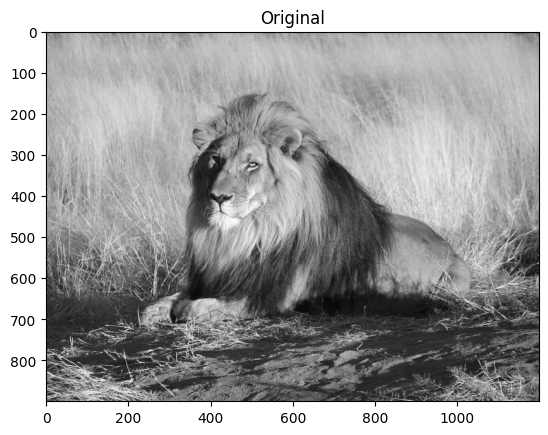

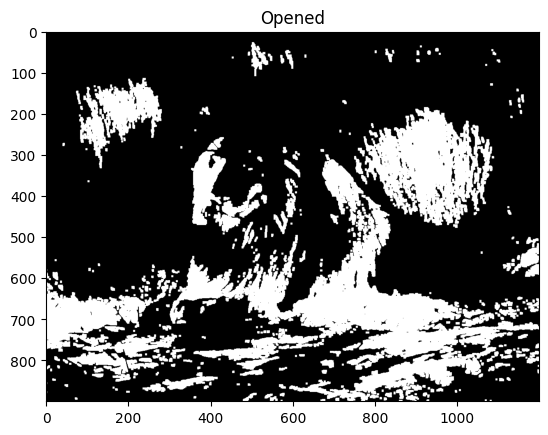

In [4]:
img = cv.imread("test_holo.jpg", cv.IMREAD_GRAYSCALE)

pltDisplayGray('Original', img)

gamma = 5  # Vous pouvez ajuster ce coefficient selon vos besoins
gamma_corrected = np.power(img / 255.0, gamma) * 255.0
end = np.uint8(gamma_corrected)

# define the alpha and beta
alpha = 1.8 # Contrast control
beta= -248

# call convertScaleAbs function

end = cv.convertScaleAbs(img, alpha=alpha, beta=beta)
ret,end = cv.threshold(end,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)   
kernel_size = 5
kernel = cv.getStructuringElement(cv.MORPH_RECT, (kernel_size, kernel_size))
end = cv.morphologyEx(end, cv.MORPH_OPEN, kernel)

pltDisplayGray('Opened', end)